In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
from sub_projects.ray_optimization.configuration import params_to_func
from ray_optim.plot import Plot
import torch
from matplotlib import pyplot as plt
from typing import List, Tuple

## Setup

In [13]:
samples_count = 3
compensated = [torch.randn(3, 1000, 2) * 0.1 + 0.1 + 1.3 * i for i in range(samples_count)]
target = [torch.randn(3, 1000, 2) * 0.1 + 1.3 * i for i in range(samples_count)]
without_compensation = [torch.randn(3, 1000, 2) * 0.1 + 0.4 + 1.3 * i for i in range(samples_count)]

## Tests
### Footprint

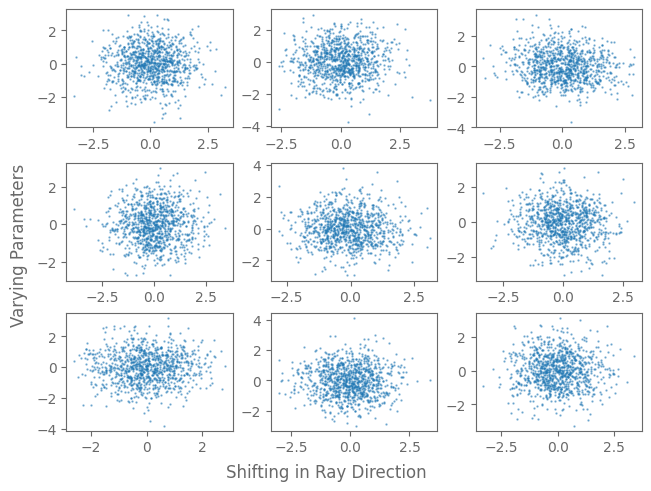

In [14]:
Plot.plot_data([torch.randn(3, 1000, 2) for i in range(3)])

### Fixed position

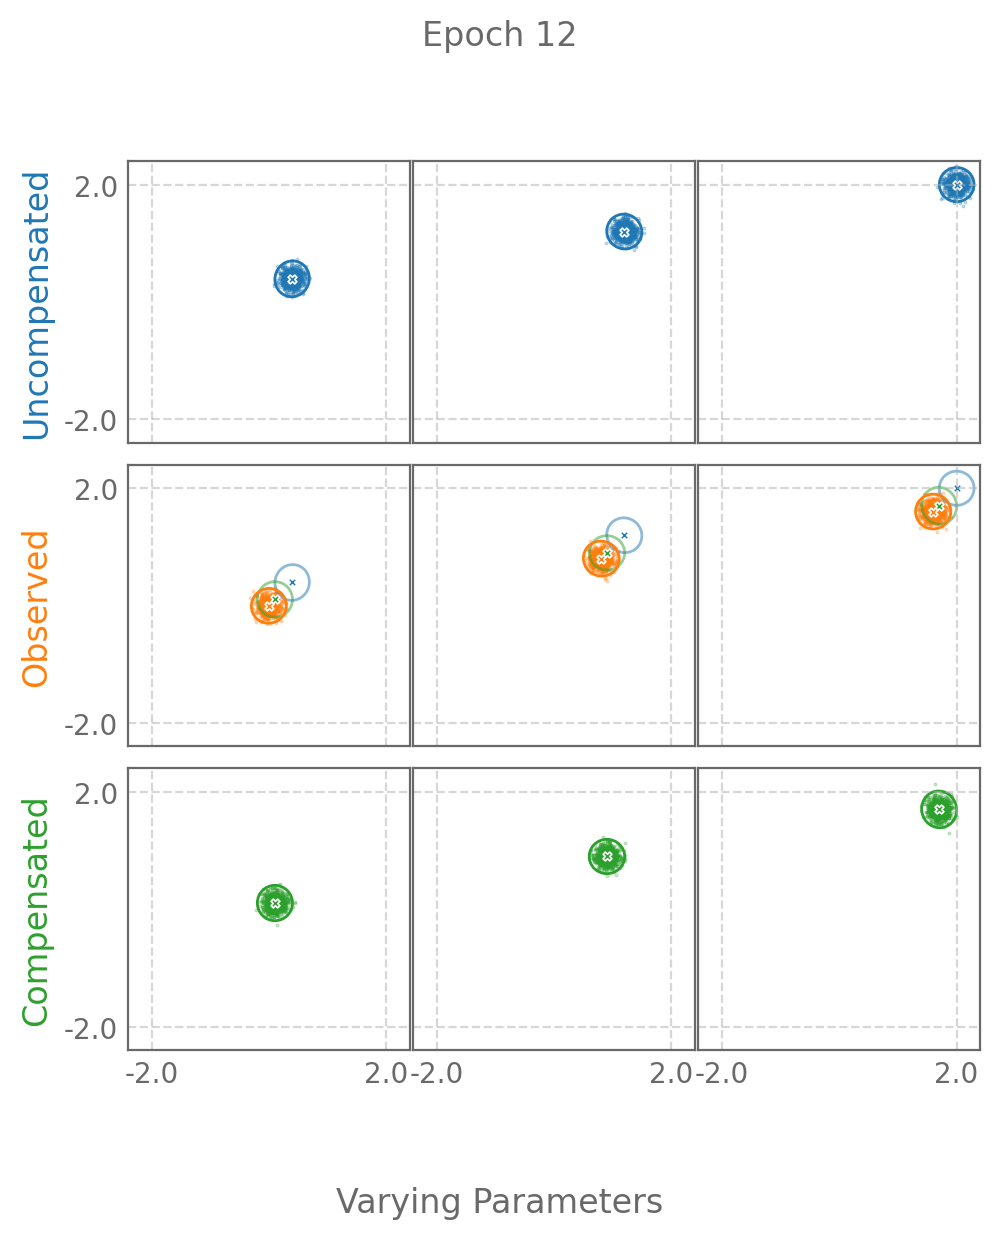

In [15]:
lims_x = (-2.0, 2.0)
lims_y = (-2.0, 2.0)
lims_x, lims_y = Plot.switch_lims_if_out_of_lim(target, lims_x=lims_x, lims_y=lims_y)
Plot.fixed_position_plot(
    compensated, target, without_compensation, lims_x, lims_y, epoch=12
)

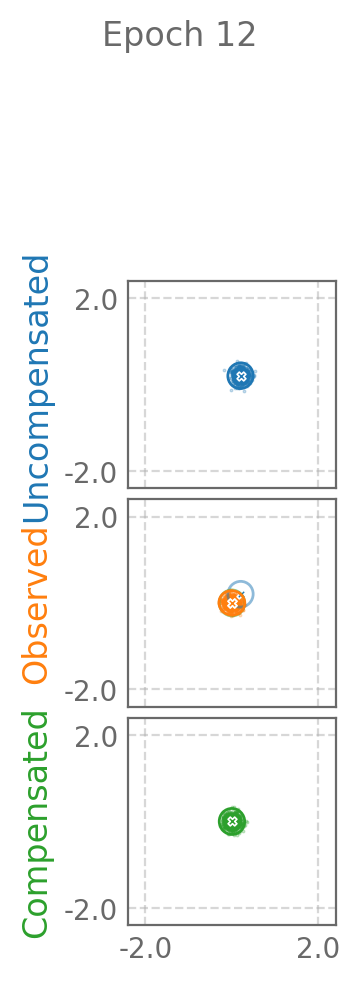

In [5]:
Plot.fixed_position_plot(
    compensated[:1], target[:1], without_compensation[:1], (-2.0, 2.0), (-2.0, 2.0), epoch=12
)

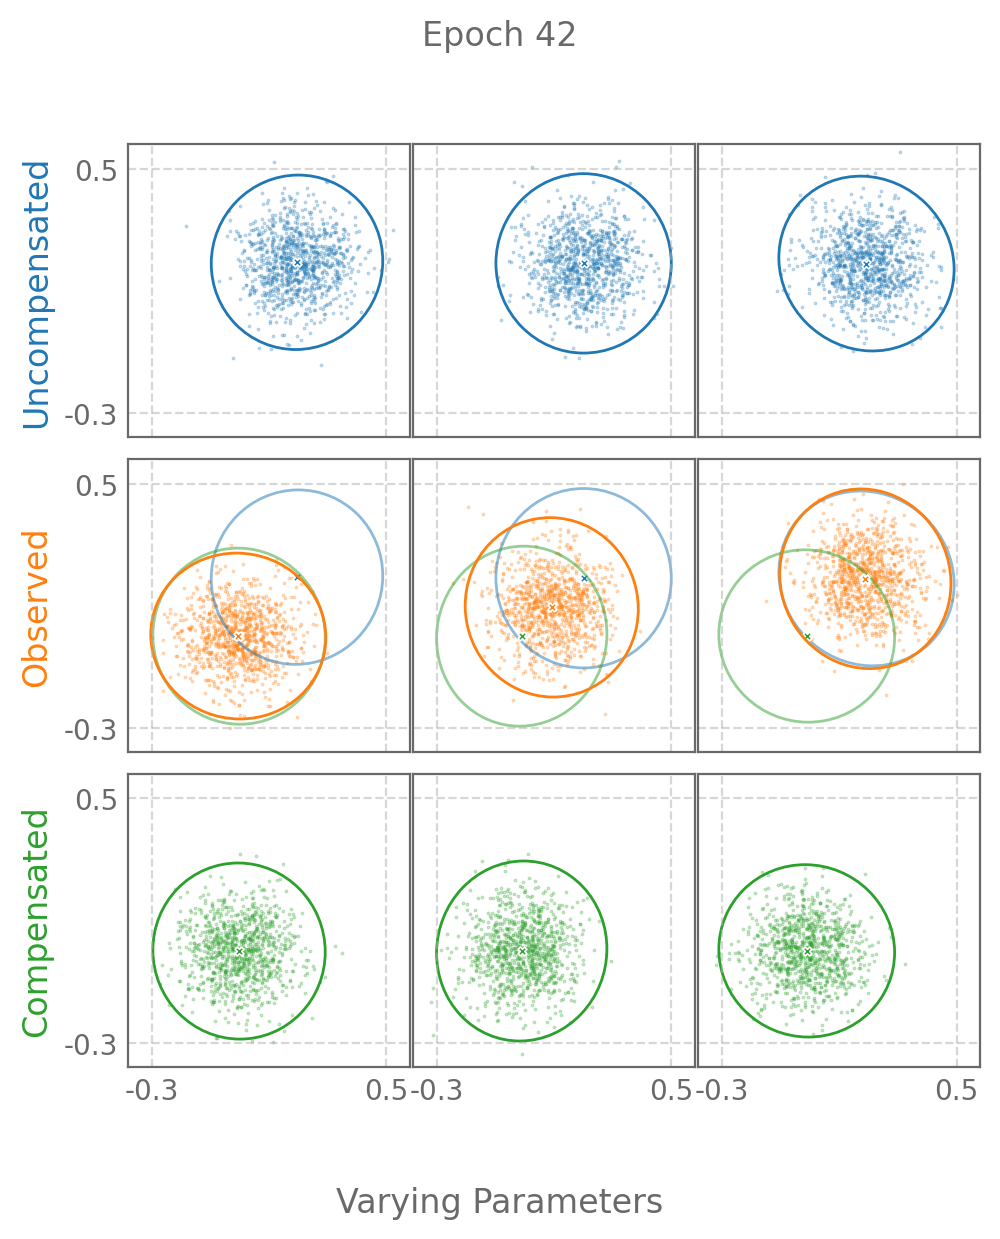

In [6]:
Plot.compensation_plot(
    compensated, target, without_compensation, epoch=42, covariance_ellipse=True
)

### Parameter comparison

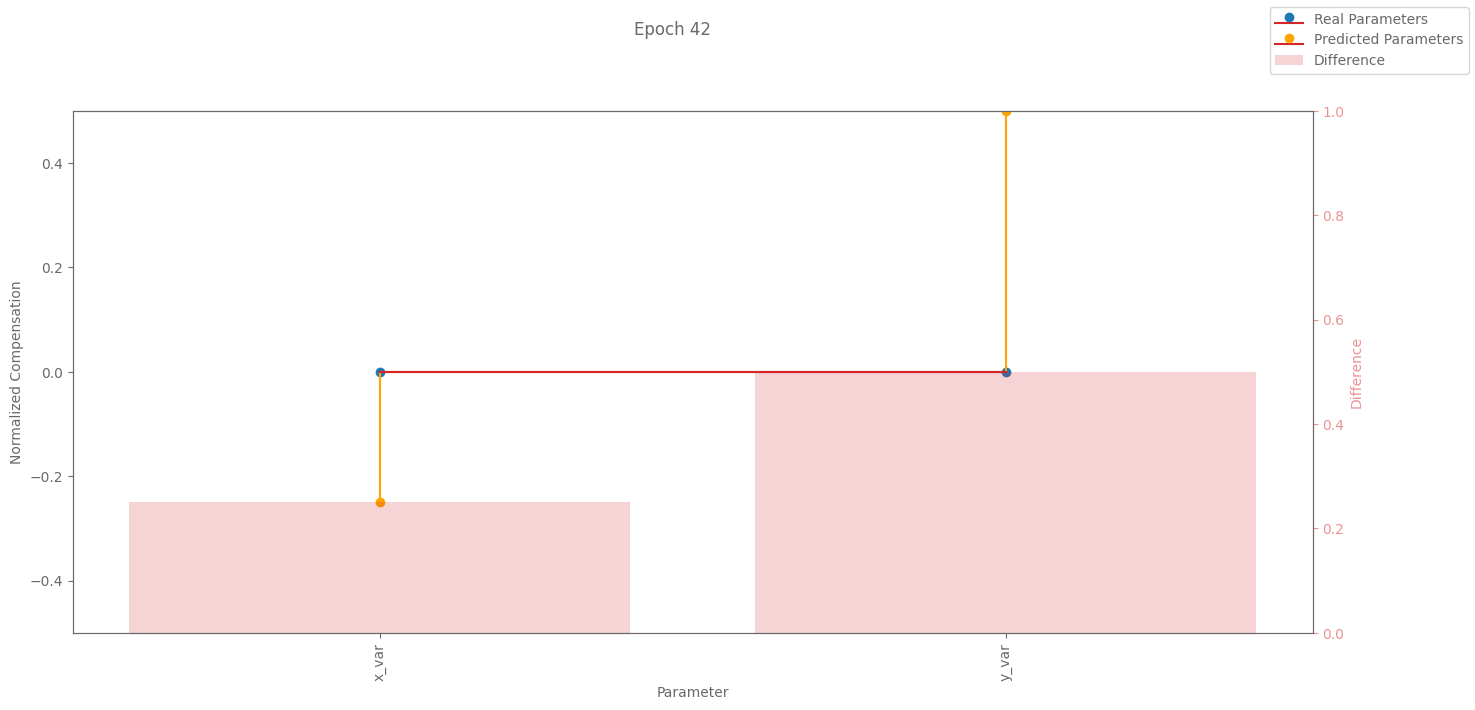

In [7]:

parameters = {
            "x_var": [-5., 5.],
            "y_var": [0., 10.],
            }
search_space = params_to_func(parameters)()
real_params = params_to_func({"x_var": 0, "y_var":5})()
predicted_params = params_to_func({"x_var": -2.5, "y_var":10.})()
Plot.plot_param_comparison(epoch=42, real_params=real_params, predicted_params=predicted_params, search_space=search_space)